## importing data

In [1]:
import pandas as pd
import numpy as nm

In [2]:
data=pd.read_csv('diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape

(768, 9)

In [5]:
data['Outcome'].unique()

array([1, 0], dtype=int64)

In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Representing the Data

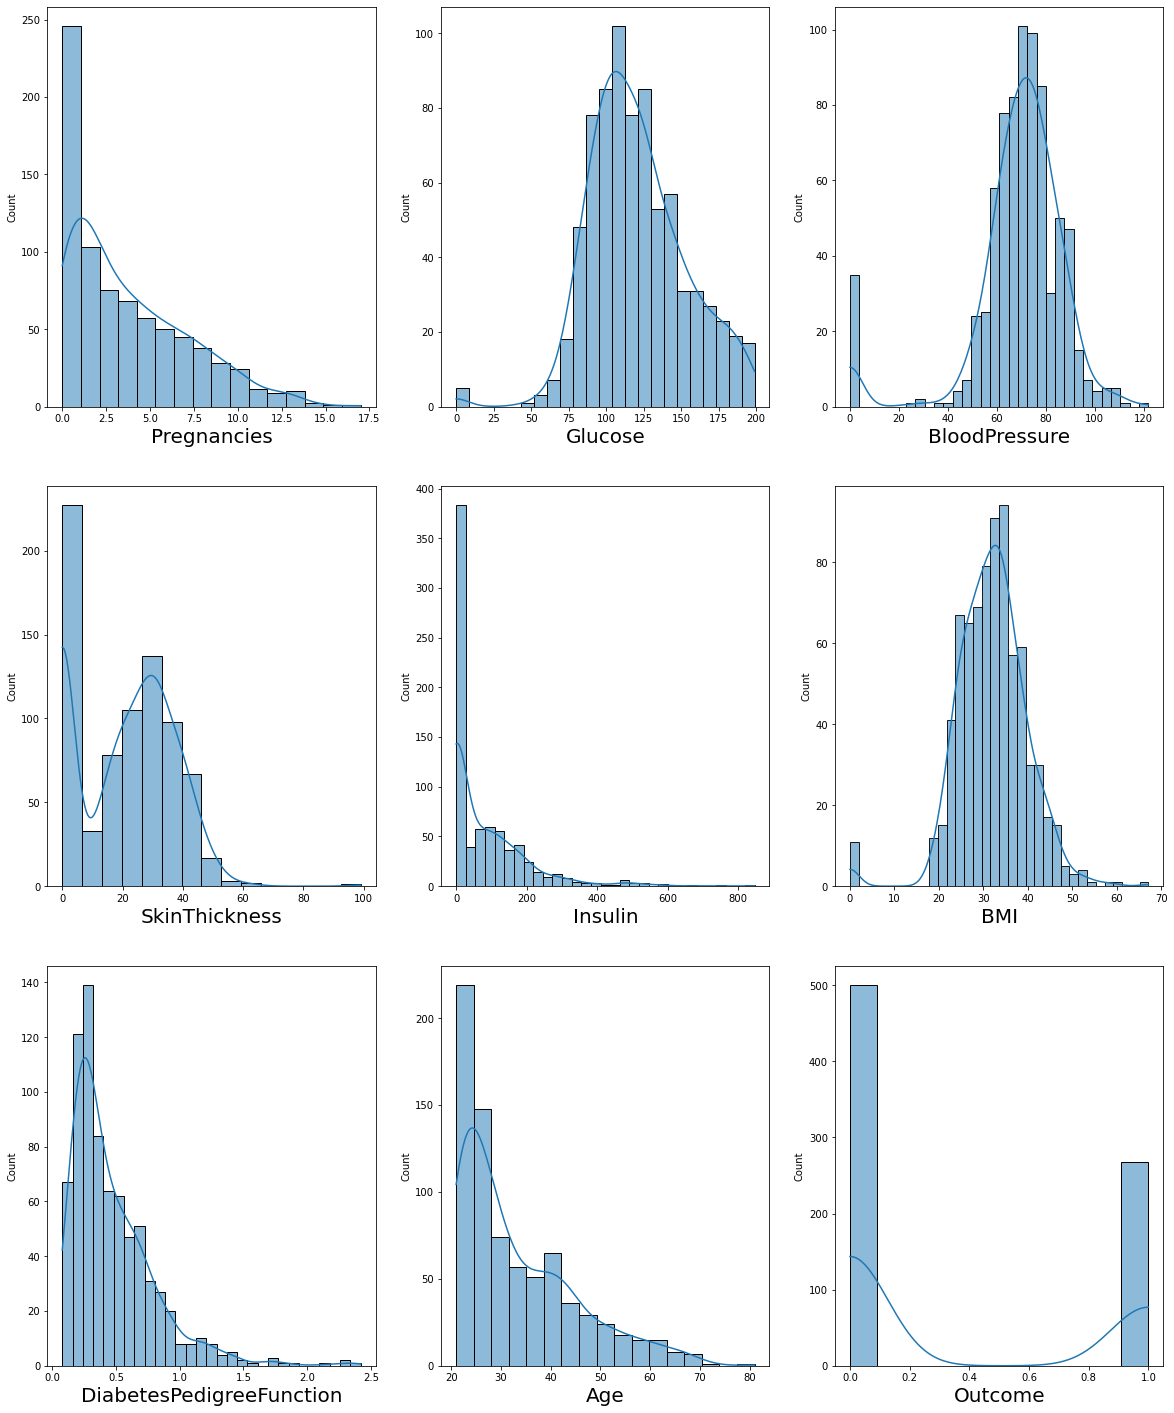

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,25))
plotnumber=1
for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.histplot(data[column],kde=True)
        plt.xlabel(column,fontsize=20)
    plotnumber += 1
plt.show()

In [8]:
import sweetviz as sz
report=sz.analyze(data)
report.show_html("./report.html")


Report ./report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Fitting Data

In [9]:
data['BMI']=data['BMI'].replace(0,data['BMI'].mean())
data['Age']=data['Age'].replace(0,data['Age'].mean())
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())

In [10]:
x=data.drop(columns=['Outcome'])
y=data['Outcome']

In [11]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)

## Splitting Data

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=100)

In [13]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(x_test.shape)

(652, 8)
(116, 8)
(652,)
(116, 8)


## Training KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn=KNeighborsClassifier()
param_grid={'algorithm':['auto', 'ball_tree','kd_tree','brute'], 'leaf_size':[2,3,5,6,8,10,12,14],
    'n_neighbors':[3,5,7,9,11,13,15,17,19]}
gridsearch=GridSearchCV(knn,param_grid)
gridsearch.fit(x_train,y_train)
gridsearch.best_params_

In [ ]:
knn=KNeighborsClassifier(algorithm='auto', leaf_size=2, n_neighbors=15)

In [ ]:
knn.fit(x_train,y_train)

In [ ]:
knn.score(x_train,y_train)

## Predicting

In [ ]:
pred=knn.predict(x_test)
pred

In [ ]:
knn.score(x_test,y_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(pred,y_test))

In [ ]:
print(confusion_matrix(pred,y_test))